# WE08 keras- Model Fitting
# Bapuji Satyala 
# U61600601

In this Notebook will be using the dataframe that is saved in the csv format which contains preprocessed data and there by i will implement the Keras model of branching wide and Deep approach, where i have considered three variations of the Keras Deep and Wide network.

## Importing the required libraries that we will be using in this note book.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from imblearn.under_sampling import RandomUnderSampler

tf.random.set_seed(1)
np.random.seed(1)

Importing the dataframe the file that contains preprocessed data.

In [2]:
df=pd.read_csv('KERAS_NN_DATA.csv')

Splitting the data into X and y based on features into X and target intoo y.

In [3]:
X=df.drop('cid',axis=1)
y=df['cid']

### Step 4: Splitting the data into Train set and the Test set  where our target column is still not seperated.

The 'train_test_split'  is to divide the dataset into training and test data. It separates the features ('X_train' and 'X_test') and the target variable ('y_train' and 'y_test') with a 20% test size, i have considered the 80% of training set as the total number of observations are less

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

### Step 5: Balancing the data 

Here we are balancing the dataset and we are using the RandomUnderSampler for attaining the goal, The random undersampler is used as the distribution of the classes are skewed as the data is looking biased,the randomunders sampler randomly removes  the  the majority class in the train set data.

In [5]:
rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

### Step 6: Creating the Keras Neural Network model and fitting it

#### Keras Neural Network with depth of two layers and one  Wide layer

The Keras runs on the top of the tensor flow which is high level API, in keras models the API will let us build complicated neural networks there by adding and deleting the layers.There will be input layer, shape of which will be in line with number of features of the dataset and there output layer/final layer will have neurons and these neuron count will differ with the type of the problem we are dealing with. When it a regressor type problem there will be one neuron as the output will be a single continuous output, when it comes to the multi class problem the number of neurons depends on the number of classes. In our case we have a classification problem of binary class so out output layer will have only one neuron. There will be layers between the input layers and the output layers called the hidden layers which perform the transformation of the input data through weighted connections and there by using the activation  function to produce the final output.The Number of the hidden layers and the number of the neurons will determine the depth and the complexity.The lower layers usually captures the simple features and the higher layers will be capturing the more complex features. 

There are three approaches in the keras Neural network, the Wide Approach will be inclusion of the wide set of the features in the model, where it focuses on the having the larger number of input features that are directly connected to the output layer. In the Deep Approach we will building multiple hidden layers where the built consists of the multiple layers stacked on eachother.The number of the neurons in each hidden layer works as hyperparameter that can be tuned based on the type of the problem.

In [6]:
normalization_layer = tf.keras.layers.Normalization()
deep_layer1 = tf.keras.layers.Dense(50, activation="relu")
deep_layer2 = tf.keras.layers.Dense(50, activation="relu")
wide_layer1 = tf.keras.layers.Dense(100, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1, activation="sigmoid")
#
input_ = tf.keras.layers.Input(shape=(22,))
normalized = normalization_layer(input_)
deep1 = deep_layer1(normalized)
deep2 = deep_layer2(deep1)
wide1 = wide_layer1(normalized)
concat = concat_layer([deep2, wide1])
output = output_layer(concat)
#
model = tf.keras.Model(inputs=[input_], outputs=[output])

Here we are creating the normalization_layer to normalize the inputs. as this normalization will scale the values that will ease the computation, if they are not normalized then different features will be sclaed at different levels which will increase the computational time.
 I have considered two dense layers which have 50 units which means 50 neurons and the activation function is relu which means rectified linear unit basic functionality of a activation function is to introduce non linearity to the network which allows the network to approximate complex functions and learn mappings between ther input and the output.Without an activation function the network learns only the linear transformations of the input data. These dense layers are the hidden layers in the neural network that will perform the linear transformations of the layers connected ie the input layers which are followed by activation funcion relu which will add non linearity the bias along with the weight will be added in the se layers.
 
 The input layers shape is 22 as the no umber of features in our dataset are 22 and those are passed along and as this is a wide and deep approach a wide layer has been added which is again fed with the normalization which will scale the features that pass through the wide layer as well and considered 100 neurons in the wide layer will capture the broader patterns whereas the hidden layer focuses on the hierarchal representations and we are concating the deep2 layer which is the last deep layer and the wide1 layer which is the last wide layer the model can capture both the fine grained details and the patterns from the input data.
 
 As we specified both the input and output layers then we are passing them through the class tf.keras.model
 
 


In [7]:

model.compile(optimizer='adam', loss='binary_crossentropy',  metrics=['accuracy'])


The Neural network model has to be compiled before the training, here we have considered the optimizer as adam which adjust the learning rate dynamically for each parameter during the training it also adds implicit regularization on the parameters during optimization and the loss is set to binary_crossentropy which is used for the binary problem, it measures the difference between the predicted probabilities and the and the true labels, this loss function penalizes the model more for the predictions that are far from the true labels and i have onsidered the metric as accuracy.

Here we are looking at the summary of the neural network where we can see the proper architecture of the network, where the input layer have shape of 22 which specifies that there are 22 features wheich we have passed in the earlier stage and then we can see the normalization layer which is internally connected to the input layer as we have passed it and we have also normalized the hidden layer 1 as well that information is seen in the connected to column, the number of neurons that are assigned in each layers and in the concat layer we can see that there are 150 neurons which shows that the layers are combined ie the dense 2 layer and the wide layer 1

In [8]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 22)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 22)        │         45 │ input_layer[0][0] │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 50)        │      1,150 │ normalization[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 50)        │      2,550 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 100)       │      2,300 │ normalization[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 150)       │          0 │ dense_1[0][0],    │
│ (Concatenate)       │                   │            │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │        151 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 6,196 (24.21 KB)

 Trainable params: 6,151 (24.03 KB)

 Non-trainable params: 45 (184.00 B)

The total parametersare 6196, they do include the weights and biases of the layersin the model where there are 6151 parameters that are trainable parameters that will be updated during the training through backpropogation and there are 45 are not trained  parameters that and we can see the memory usage of these parameters.

Here we are fitting  the model with the trained data which and we are also giving the validation data ie the test data which are required to evaluate the model performance which is not the case in general models.The epochs are the iterations that are performed over the entire dataset each epoch will have one formward and pone backward pass of all the training.The batch size will let us know the number of samples that needs to be processed per epoch. in ideal cases it is always better to give it in full size of samples, these number of observations are pushed to memory and then used for training in each epoch.

In [9]:
history = model.fit(X_resampled, y_resampled, 
                    validation_data=(X_test, y_test), 
                    epochs=50,batch_size=2139)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.4925 - loss: 134.1378 - val_accuracy: 0.2897 - val_loss: 145.1960
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.4851 - loss: 104.4599 - val_accuracy: 0.2804 - val_loss: 103.7322
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.4590 - loss: 77.4387 - val_accuracy: 0.3224 - val_loss: 67.2519
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.4527 - loss: 55.1085 - val_accuracy: 0.3925 - val_loss: 39.2452
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.4465 - loss: 39.4244 - val_accuracy: 0.4883 - val_loss: 22.5733
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.4167 - loss: 32.6208 - val_accuracy: 0.7033 - val_loss: 20.6439
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5062 - loss: 38.4242 - val_accuracy: 0.7220 - val_loss: 24.6716
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.5000 - loss: 45.3479 - val_accuracy: 0.7220 - 

We have the history that contains the metric information such as accuracy and the loss on both validation and the training data,
here we are seeing all the accuracy's that are dervided in each epoch

In [10]:
history.history['val_accuracy']

[0.2897196114063263,
 0.28037384152412415,
 0.322429895401001,
 0.3925233781337738,
 0.4883177578449249,
 0.7032710313796997,
 0.7219626307487488,
 0.7219626307487488,
 0.7219626307487488,
 0.7266355156898499,
 0.7406542301177979,
 0.6799065470695496,
 0.5747663378715515,
 0.4859813153743744,
 0.38317757844924927,
 0.36915886402130127,
 0.4065420627593994,
 0.45093458890914917,
 0.6004672646522522,
 0.7406542301177979,
 0.7710280418395996,
 0.7850467562675476,
 0.7920560836791992,
 0.7897196412086487,
 0.7873831987380981,
 0.7827102541923523,
 0.7733644843101501,
 0.7406542301177979,
 0.7102803587913513,
 0.672897219657898,
 0.6518691778182983,
 0.6285046935081482,
 0.6518691778182983,
 0.6845794320106506,
 0.7289719581604004,
 0.7920560836791992,
 0.7780373692512512,
 0.8014018535614014,
 0.8014018535614014,
 0.8014018535614014,
 0.7990654110908508,
 0.7102803587913513,
 0.577102780342102,
 0.5327102541923523,
 0.6401869058609009,
 0.7453271150588989,
 0.764018714427948,
 0.7313084006

Here we are plotting the graphs between the accuracies ie both the train set accuracy and the validation set accuracy while they are vaying with the epoch count.

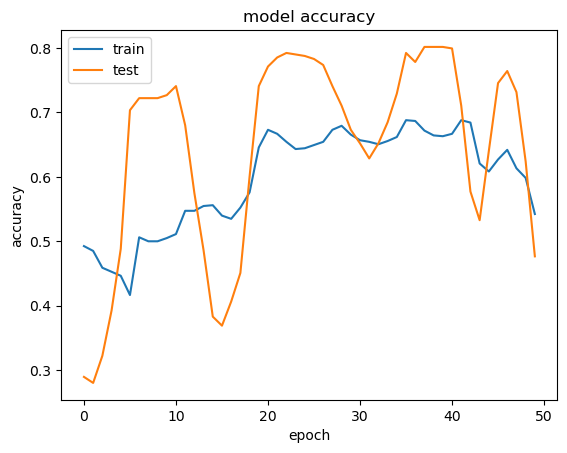

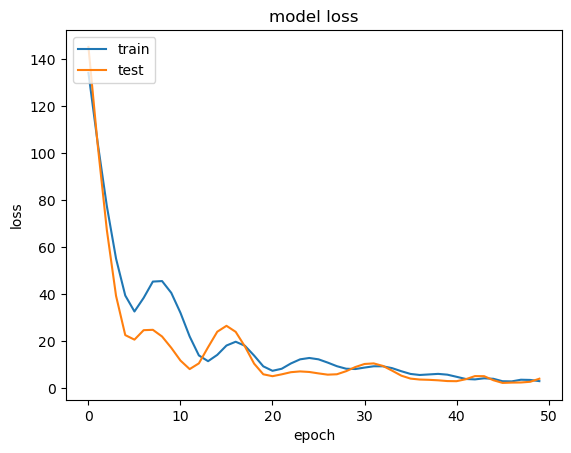

In [11]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

By looking at the above graphs we can see that the loss of the model is quite constant from around 30 epochs which suggests that the training of the model can be restricted around 30 - 35 as we can see that the graph looks nearing zero and there is no drastical changes and if the epoch number is increased beyond 50 there will be a point where the loss will start increasing.

evaluating the validation loss and the accuracy of the validation set and printing the values.

In [12]:
val_loss, val_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f'Validation loss: {val_loss:.4f}')
print(f'Validation accuracy: {val_accuracy:.4f}')

Validation loss: 4.0986
Validation accuracy: 0.4766


#### Keras Neural Network with depth of three layers and one Wide layer

The input layer's shape is 22 as the number of features in our dataset are 22 and those are passed along and i have varied the depth of the model by adding additional hidden layer which is deep3 and as this is a wide and deep approach a wide layer has been added which is again fed with the normalization which will scale the features that pass through the wide layer as well and considered 100 neurons in the wide layer will capture the broader patterns whereas the hidden layer focuses on the hierarchal representations and we are concating the deep3 layer which is the last deep layer and the wide1 layer which is the last wide layer the model can capture both the fine grained details and the patterns from the input data.
 
 As we specified both the input and output layers then we are passing them through the class tf.keras.model
 
 


In [13]:
normalization_layer = tf.keras.layers.Normalization()
deep_layer1 = tf.keras.layers.Dense(50, activation="relu")
deep_layer2 = tf.keras.layers.Dense(50, activation="relu")
deep_layer3 = tf.keras.layers.Dense(50, activation="relu")
wide_layer1 = tf.keras.layers.Dense(100, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1, activation="sigmoid")
#
input1_ = tf.keras.layers.Input(shape=(22,))
normalized = normalization_layer(input1_)
deep1 = deep_layer1(normalized)
deep2 = deep_layer2(deep1)
deep3 = deep_layer3(deep2)
wide1 = wide_layer1(normalized)
concat1 = concat_layer([deep3, wide1])
output1 = output_layer(concat1)
#
model1 = tf.keras.Model(inputs=[input1_], outputs=[output1])

In [14]:

model1.compile(optimizer='adam', loss='binary_crossentropy',  metrics=['accuracy'])


Here we are looking at the summary of the neural network where we can see the proper architecture of the network, where the input layer have shape of 22 which specifies that there are 22 features which we have passed in the earlier stage and then we can see the normalization layer which is internally connected to the input layer as we have passed it and we have also normalized the hidden layer 1 as well that information is seen in the connected to column, the number of neurons that are assigned in each layers and in the concat layer we can see that there are 150 neurons which shows that the layers are combined ie the dense 2 layer and the wide layer 1

In [15]:
model1.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 22)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 22)        │         45 │ input_layer_1[0]… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 50)        │      1,150 │ normalization_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 50)        │      2,550 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 50)        │      2,550 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 100)       │      2,300 │ normalization_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 150)       │          0 │ dense_6[0][0],    │
│ (Concatenate)       │                   │            │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 1)         │        151 │ concatenate_1[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 8,746 (34.17 KB)

 Trainable params: 8,701 (33.99 KB)

 Non-trainable params: 45 (184.00 B)

The total parametersare 8746, they do include the weights and biases of the layersin the model where there are 8701 parameters that are trainable parameters that will be updated during the training through backpropogation and there are 45 are not trained  parameters that and we can see the memory usage of these parameters.

Here we are fitting  the model with the trained data which and we are also giving the validation data ie the test data which are required to evaluate the model performance which is not the case in general models.The epochs are the iterations that are performed over the entire dataset each epoch will have one formward and pone backward pass of all the training.The batch size will let us know the number of samples that needs to be processed per epoch. in ideal cases it is always better to give it in full size of samples, these number of observations are pushed to memory and then used for training in each epoch.

In [16]:
history = model1.fit(X_resampled, y_resampled, 
                    validation_data=(X_test, y_test), 
                    epochs=50,batch_size=2139)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3570 - loss: 30.4364 - val_accuracy: 0.5397 - val_loss: 16.1656
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.4279 - loss: 24.5482 - val_accuracy: 0.5350 - val_loss: 12.3269
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.4378 - loss: 18.1324 - val_accuracy: 0.4650 - val_loss: 12.6158
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.4913 - loss: 13.6202 - val_accuracy: 0.5117 - val_loss: 13.2797
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.5498 - loss: 12.2690 - val_accuracy: 0.6028 - val_loss: 9.3989
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.5833 - loss: 9.6632 - val_accuracy: 0.7196 - val_loss: 6.4492
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6256 - loss: 8.3786 - val_accuracy: 0.7126 - val_loss: 5.7867
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6169 - loss: 8.8468 - val_accuracy: 0.7243 - val_loss: 

We have the history that contains the metric information such as accuracy and the loss on both validation and the training data,
here we are seeing all the accuracy's that are dervided in each epoch

In [17]:
history.history['val_accuracy']

[0.5397196412086487,
 0.5350467562675476,
 0.4649532735347748,
 0.5116822719573975,
 0.6028037667274475,
 0.7196261882781982,
 0.7126168012619019,
 0.7242990732192993,
 0.7149532437324524,
 0.7009345889091492,
 0.6845794320106506,
 0.6869158744812012,
 0.7172897458076477,
 0.7476635575294495,
 0.7593457698822021,
 0.7757009267807007,
 0.7710280418395996,
 0.7523364424705505,
 0.7149532437324524,
 0.7126168012619019,
 0.7570093274116516,
 0.7523364424705505,
 0.7219626307487488,
 0.4883177578449249,
 0.4813084006309509,
 0.644859790802002,
 0.5957943797111511,
 0.5023364424705505,
 0.672897219657898,
 0.75,
 0.7523364424705505,
 0.7126168012619019,
 0.7546728849411011,
 0.7803738117218018,
 0.7850467562675476,
 0.7476635575294495,
 0.7242990732192993,
 0.7289719581604004,
 0.7686915993690491,
 0.7523364424705505,
 0.65887850522995,
 0.7570093274116516,
 0.7383177280426025,
 0.6378504633903503,
 0.7383177280426025,
 0.7546728849411011,
 0.6799065470695496,
 0.7733644843101501,
 0.7873831

Here we are plotting the graphs between the accuracies ie both the train set accuracy and the validation set accuracy while they are vaying with the epoch count.

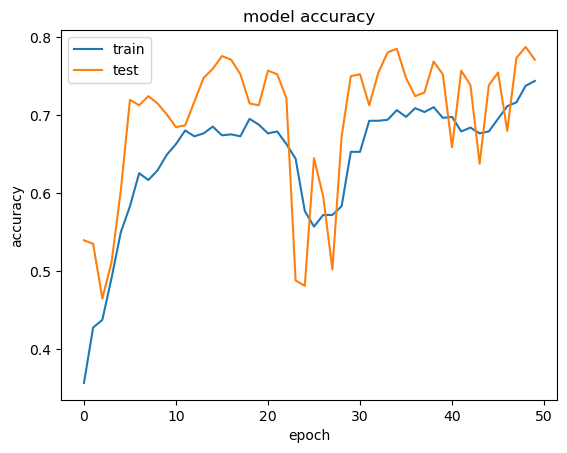

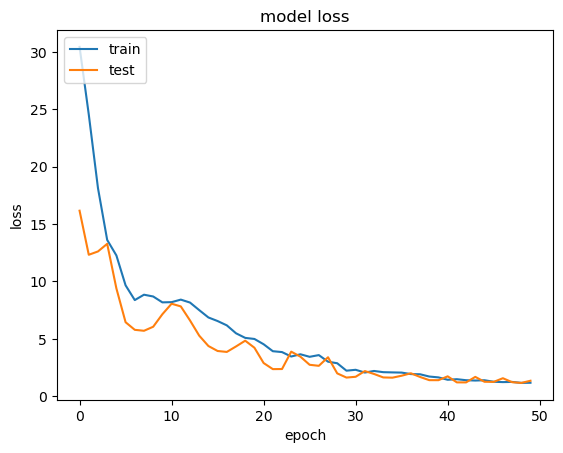

In [18]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

By looking at the above graph we can see that the loss of the model is quite constant and the train and test loss is quite similar until the epoch 5 and it varied until and it started following the path of the loss of test data from around 31 epochs which suggests that the training of the model can be restricted around 40 as we can see that the graph looks nearing zero and there will not be drastical changes and if the epoch number is increased beyond 50 there will be a point where the loss will start increasing.

evaluating the validation loss and the accuracy of the validation set and printing the values.

In [19]:
val_loss, val_accuracy = model1.evaluate(X_test, y_test, verbose=0)
print(f'Validation loss: {val_loss:.4f}')
print(f'Validation accuracy: {val_accuracy:.4f}')

Validation loss: 1.3437
Validation accuracy: 0.7710


####  Keras Neural Network with depth of two layers and two Wide layers

The input layer's shape is 22 as the number of features in our dataset are 22 and those are passed along and i have varied the Width of the model by adding additional wide layer which is wide2 and as this is a wide and deep approach a wide layer has been added which is again fed with the normalization which will scale the features that pass through the wide layers as well and considered 100 neurons in the wide layers will capture the broader patterns whereas the hidden layer focuses on the hierarchal representations and we are concating the deep3 layer which is the last deep layer and the wide1 layer which is the last wide layer the model can capture both the fine grained details and the patterns from the input data.
 
As we specified both the input and output layers then we are passing them through the class tf.keras.model
 
 


In [20]:
normalization_layer = tf.keras.layers.Normalization()
deep_layer1 = tf.keras.layers.Dense(50, activation="relu")
deep_layer2 = tf.keras.layers.Dense(50, activation="relu")
wide_layer1 = tf.keras.layers.Dense(100, activation="relu")
wide_layer2 = tf.keras.layers.Dense(100, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1, activation="sigmoid")
#
input2_ = tf.keras.layers.Input(shape=(22,))
normalized = normalization_layer(input2_)
deep1 = deep_layer1(normalized)
deep2 = deep_layer2(deep1)
wide1 = wide_layer1(normalized)
wide2 = wide_layer2(wide1)
concat2 = concat_layer([deep2, wide2])
output2 = output_layer(concat2)
#
model2 = tf.keras.Model(inputs=[input2_], outputs=[output2])

In [21]:

model2.compile(optimizer='adam', loss='binary_crossentropy',  metrics=['accuracy'])


Here we are looking at the summary of the neural network where we can see the proper architecture of the network, where the input layer have shape of 22 which specifies that there are 22 features which we have passed in the earlier stage and then we can see the normalization layer which is internally connected to the input layer as we have passed it and we have also normalized the hidden layer 1 as well that information is seen in the connected to column, the number of neurons that are assigned in each layers and in the concat layer we can see that there are 150 neurons which shows that the layers are combined ie the dense 2 layer and the wide layer 2

In [22]:
model2.summary()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 22)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_2     │ (None, 22)        │         45 │ input_layer_2[0]… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 50)        │      1,150 │ normalization_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 100)       │      2,300 │ normalization_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 50)        │      2,550 │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 100)       │     10,100 │ dense_11[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 150)       │          0 │ dense_10[0][0],   │
│ (Concatenate)       │                   │            │ dense_12[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 1)         │        151 │ concatenate_2[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 16,296 (63.66 KB)

 Trainable params: 16,251 (63.48 KB)

 Non-trainable params: 45 (184.00 B)

The total parametersare 18500, they do include the weights and biases of the layersin the model where there are 6151 parameters that are trainable parameters that will be updated during the training through backpropogation and there are 45 are not trained  parameters that and we can see the memory usage of these parameters.


Here we are fitting  the model with the trained data which and we are also giving the validation data ie the test data which are required to evaluate the model performance which is not the case in general models.The epochs are the iterations that are performed over the entire dataset each epoch will have one formward and pone backward pass of all the training.The batch size will let us know the number of samples that needs to be processed per epoch. in ideal cases it is always better to give it in full size of samples, these number of observations are pushed to memory and then used for training in each epoch.



In [23]:
history = model2.fit(X_resampled, y_resampled, 
                    validation_data=(X_test, y_test), 
                    epochs=50,batch_size=2139)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5000 - loss: 135.8249 - val_accuracy: 0.2780 - val_loss: 126.0808
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.5000 - loss: 87.7455 - val_accuracy: 0.2757 - val_loss: 57.4511
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.4838 - loss: 40.6166 - val_accuracy: 0.6612 - val_loss: 8.6170
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.5162 - loss: 15.2717 - val_accuracy: 0.7266 - val_loss: 19.2986
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.5000 - loss: 37.0588 - val_accuracy: 0.7243 - val_loss: 22.5563
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.5000 - loss: 43.0587 - val_accuracy: 0.7243 - val_loss: 19.3145
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5012 - loss: 37.3553 - val_accuracy: 0.7290 - val_loss: 11.7974
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.5062 - loss: 24.0392 - val_accuracy: 0.7944 - val

We have the history that contains the metric information such as accuracy and the loss on both validation and the training data,
here we are seeing all the accuracy's that are dervided in each epoch

In [24]:
history.history['val_accuracy']

[0.2780373692512512,
 0.2757009267807007,
 0.6612149477005005,
 0.7266355156898499,
 0.7242990732192993,
 0.7242990732192993,
 0.7289719581604004,
 0.7943925261497498,
 0.7219626307487488,
 0.5257009267807007,
 0.5023364424705505,
 0.5,
 0.5350467562675476,
 0.6308411359786987,
 0.7383177280426025,
 0.8014018535614014,
 0.8037382960319519,
 0.8060747385025024,
 0.8014018535614014,
 0.8037382960319519,
 0.8107476830482483,
 0.8084112405776978,
 0.8037382960319519,
 0.7219626307487488,
 0.5934579372406006,
 0.5350467562675476,
 0.586448609828949,
 0.7079439163208008,
 0.7710280418395996,
 0.8060747385025024,
 0.8060747385025024,
 0.7897196412086487,
 0.7126168012619019,
 0.6074766516685486,
 0.5023364424705505,
 0.5350467562675476,
 0.644859790802002,
 0.7523364424705505,
 0.7897196412086487,
 0.7990654110908508,
 0.764018714427948,
 0.7313084006309509,
 0.6495327353477478,
 0.6331775784492493,
 0.7126168012619019,
 0.7663551568984985,
 0.7733644843101501,
 0.7803738117218018,
 0.7616822

Here we are plotting the graphs between the accuracies ie both the train set accuracy and the validation set accuracy while they are vaying with the epoch count.

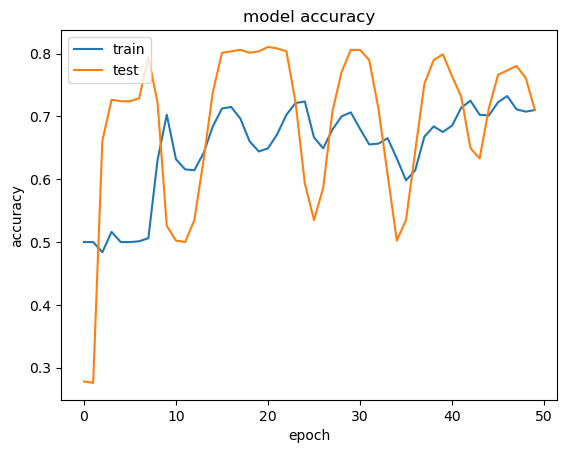

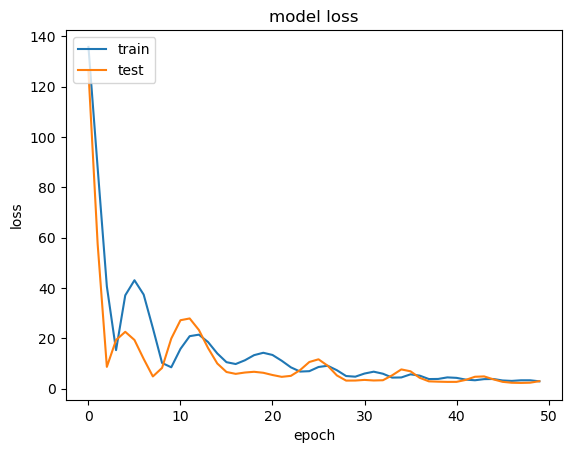

In [25]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


By looking at the above graph we can see that the loss of the model is quite changing for both the train and test loss, it varied until and it started following the path of the loss of test data from around 45 epochs which suggests that the training of the model can be done until 45 which furter training will increase the loss further 

evaluating the validation loss and the accuracy of the validation set and printing the values.

In [26]:
val_loss, val_accuracy = model2.evaluate(X_test, y_test, verbose=0)

print(f'Validation loss: {val_loss:.4f}')
print(f'Validation accuracy: {val_accuracy:.4f}')

Validation loss: 2.9000
Validation accuracy: 0.7103


### Summary:

I have Considered a dataset from the UCI repository which holds the data of the patients that are diagnosed with AIDS, by considering the two types of treatments that patients have recieved and the task is to predict whether each patient died within certain window or not.The dataset consisted of 24 features and one target where our target is the censory indicator which inidicates that the patient have died or not, it is a classification problem, i have dropped the variables that are not relavant to the analysis and splitted the data into 80% of the train set and the 20% as the test set and the preporocessing of the data has been done.As this is a binary class classification checked if the target is balanced class or not and as the target is imbalanced, applied the random undersampler technique to handle the imbalancing by randomly removing the majority class samples until the balancing has been acheived. The keras neural network has been implemented and then by training the model by the 80% of trained data and 20% of test data has been used to predict the model there by selecting the accuracy as metric the below are the results.

Keras Neural Network with depth of two layers and one  Wide layer.
- Validation loss: 1.2323
- Validation accuracy: 0.7874
    
    
Keras Neural Network with depth of three layers and one Wide layer.
- Validation loss: 2.4004
- Validation accuracy: 0.7734
    
    
Keras Neural Network with depth of two layers and two Wide layers.
   
  - Validation loss: 1.5896
   - Validation accuracy: 0.7430
   
   
By considering the above results of the accuracy and the loss of the validation data ie the test data the validation loss of the keras neural network with depth of two layers and one wide layer stands less however looking at the accuracy is also higher when compared to the other two models where three deep layers and one wide layer case and the depth of two layers and two Wide layers. As we know the hidden layer consists of the neurons that compute weighted sum of the inputs and the activation function will help in producing the output while these combination of the multiple neurons in hidden layers will help in learning the patterns and the wide layer will allow the the neural network to learn more diverse representations, while the wide layers will also allows regularization. when considered the graph between the loss and the ephoc of the Keras Neural Network with depth of two layers and one Wide layer there is a steady drop in the loss of the trained data and there we can see that training can be restricted to 30-35 ephocs. so by considering these factors of validation loss and validation accuracy, the Keras model with depth of two layers and one  Wide layer is the best model.